# Quasi-magnetostatic (Biot-Savart) Solver Validation
## Line Source

In [1]:
from main import Coil, ObsPoints
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import mu_0, pi
import basic_obs_points as obs
import basic_coils as coils

In [2]:
line = Coil.from_csv('line_11pts_1m.csv')
plane = ObsPoints.from_csv('plane_X_500_Y_500_10mm.csv')
results = line.compute(plane)

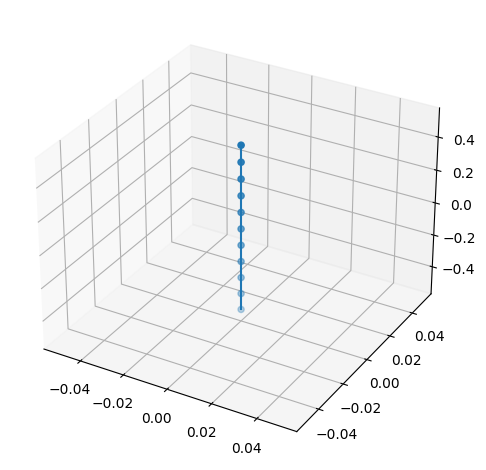

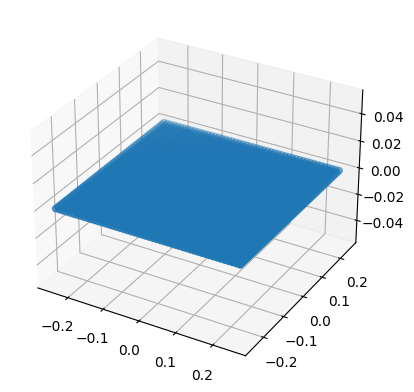

In [3]:
line.plot_coil(1)
plane.plot_points()

C:\Users\seo\AppData\Local\Temp\ipykernel_24536\1338072749.py:6: RuntimeWarning: divide by zero encountered in divide
  theoretical = mu_0/(2*pi*r*np.sqrt(4*r**2+1))
C:\Users\seo\AppData\Local\Temp\ipykernel_24536\1338072749.py:10: RuntimeWarning: divide by zero encountered in log10
  ax[0].imshow(np.log10(results_square_mag))


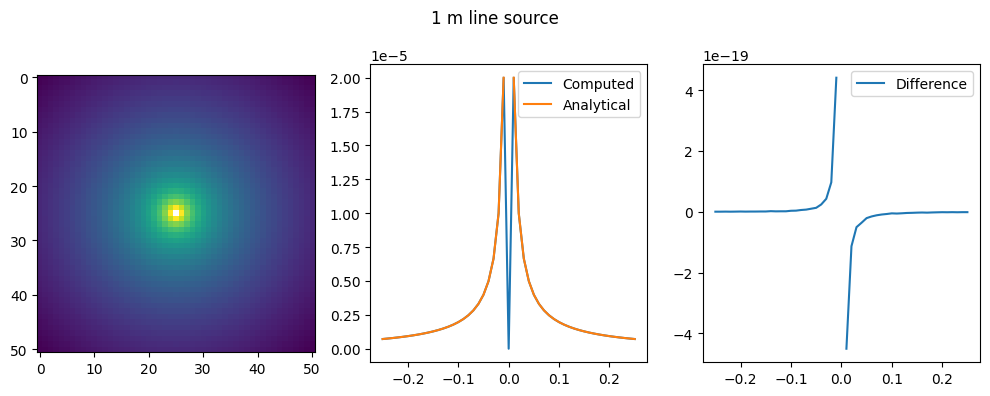

In [17]:
results_square = results.reshape((51,51,3))
results_square_mag = np.linalg.norm(results_square, axis=2)
results_square_mag[25,25]=0
x_axis = np.linspace(-.250,.250,51)
r = np.abs(x_axis)
theoretical = mu_0/(2*pi*r*np.sqrt(4*r**2+1))

fig, ax = plt.subplots(1,3)
fig.suptitle('1 m line source')
ax[0].imshow(np.log10(results_square_mag))
ax[1].plot(x_axis, results_square_mag[:,25], label = 'Computed')
ax[1].plot(x_axis, theoretical, label = 'Analytical')
ax[1].legend()
ax[2].plot(x_axis, results_square_mag[:,25]-theoretical, label = 'Difference')
ax[2].legend()
fig.set_size_inches(10,4)
fig.tight_layout()

## Loop Source

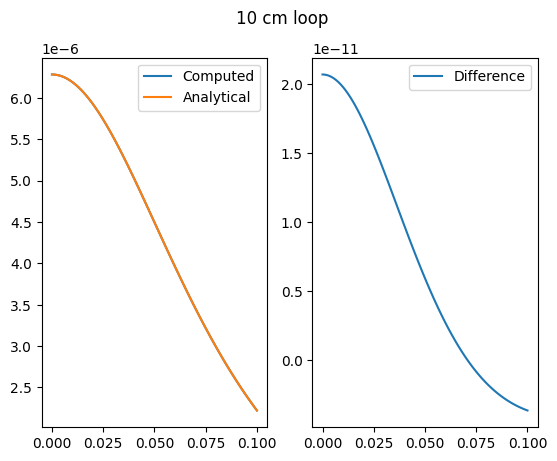

In [19]:
loop_line = ObsPoints(obs.line([0,0,0], [0,0,0.1],101))

a = 0.1
loop = Coil(coils.circ_loop(a,1000))
loop_quasi = loop.compute(loop_line)
zs = np.linspace(0,0.1,101)
analytical = mu_0*a**2/(2*(a**2+zs**2)**1.5)

fig, ax = plt.subplots(1,2)
fig.suptitle('10 cm loop')
ax[0].plot(zs, np.linalg.norm(loop_quasi,axis=1), label='Computed')
ax[0].plot(zs, analytical, label='Analytical')
ax[0].legend()
ax[1].plot(zs, np.linalg.norm(loop_quasi,axis=1)-analytical, label='Difference')
ax[1].legend()
